# Data Upload

In [1]:
# 필요 library import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 패키지 임포트
import os
import warnings

# FutureWarning 제거
warnings.simplefilter(action='ignore', category = FutureWarning)

# os 에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "Apple Gothic"
    

# -값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [2]:
# data read
infra_data = pd.read_csv('C:/Users/user/Desktop/data/infra_korea.csv', encoding='euc-kr', index_col= ["EMD_NM"])

# Basic statistics

In [3]:
infra_data.head()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
EMD_NM,,,,,,,,,,,
연제동,0,0,0,0,3,0,0,0,0,3,0
운암동,1,2,1,0,13,1,0,13,3,3,3
덕림동,0,0,1,0,0,0,0,0,0,1,1
삼거동,0,0,3,0,0,0,0,3,0,1,0
북구_동림동,0,0,1,0,6,0,0,3,1,6,3


In [4]:
infra_data.describe()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.119171,0.113990,0.492228,0.113990,1.818653,0.088083,0.041451,1.378238,0.502591,2.865285,0.575130
std,0.434568,0.417659,0.823605,0.429948,3.367007,0.405063,0.199849,2.581372,0.791388,4.089174,1.097252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000
max,3.000000,3.000000,4.000000,3.000000,16.000000,4.000000,1.000000,18.000000,4.000000,20.000000,5.000000


In [5]:
infra_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 연제동 to 충장동
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   TRAD     193 non-null    int64
 1   CONCERT  193 non-null    int64
 2   OLD      193 non-null    int64
 3   MART     193 non-null    int64
 4   LIB      193 non-null    int64
 5   ART      193 non-null    int64
 6   MUS      193 non-null    int64
 7   MED      193 non-null    int64
 8   COMM     193 non-null    int64
 9   SPORT    193 non-null    int64
 10  CHARGE   193 non-null    int64
dtypes: int64(11)
memory usage: 18.1+ KB


# Missing Value

In [6]:
infra_data.isnull()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
EMD_NM,,,,,,,,,,,
연제동,False,False,False,False,False,False,False,False,False,False,False
운암동,False,False,False,False,False,False,False,False,False,False,False
덕림동,False,False,False,False,False,False,False,False,False,False,False
삼거동,False,False,False,False,False,False,False,False,False,False,False
북구_동림동,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
쌍촌동,False,False,False,False,False,False,False,False,False,False,False
내방동,False,False,False,False,False,False,False,False,False,False,False
덕흥동,False,False,False,False,False,False,False,False,False,False,False


In [7]:
infra_data.isnull().sum()

TRAD       0
CONCERT    0
OLD        0
MART       0
LIB        0
ART        0
MUS        0
MED        0
COMM       0
SPORT      0
CHARGE     0
dtype: int64

# Standard scaler

In [8]:
# Standard Scaler  ( 표준화 )
# from sklearn.preprocessing import StandardScaler

# std = StandardScaler()
# std_data = std.fit_transform(infra_data.iloc[:, 1:])

In [9]:
# 표준화된 행렬 -> 데이터프레임 변환 
# scaled_df = pd.DataFrame(std_data, columns=['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED', 'COMM', 'SPORT', 'CHARGE'])

# MIN-MAX scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(infra_data.iloc[:, :])

In [11]:
# 표준화된 행렬 -> 데이터프레임 변환 
scaled_df = pd.DataFrame(scaled_data, columns=['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED', 'COMM', 'SPORT', 'CHARGE'])

#  ver1. 다중선형 회귀분석

In [12]:
# 독립변수 ( data )
X = scaled_df.iloc[:,:10]

In [13]:
# 종속변수 ( target )
y = scaled_df.iloc[:,-1]

In [14]:
# 흔련, 테스트 데이터 분리 - Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [15]:
lr = linear_model.LinearRegression()

In [16]:
lr_model = lr.fit(X_train, y_train)

In [17]:
# trained_coef
print(lr.coef_)

[ 0.49331863  0.23958454 -0.05049709 -0.09051906  0.08812213  0.13202092
  0.01136234  0.43201493  0.1773827   0.22386136]


In [18]:
# trained_intercept
print(lr.intercept_)

-0.002603617993212362


## 기존 값과 예측 값 비교

In [19]:
x_new = X_test
y_new = lr_model.predict(x_new)
print(type(y_test))

<class 'pandas.core.series.Series'>


In [20]:
y_compare = {'y_test' : y_test, 'y_predicted' : y_new}

In [21]:
y_compare = pd.DataFrame(y_compare)
y_compare

,y_test,y_predicted
112,0.0,0.008589
120,0.0,-0.002604
11,0.0,0.040737
128,0.0,0.041742
126,0.4,0.384616
81,0.2,0.352210
92,0.0,0.073890
160,0.0,-0.002604
83,0.0,0.030976
15,0.0,0.005911


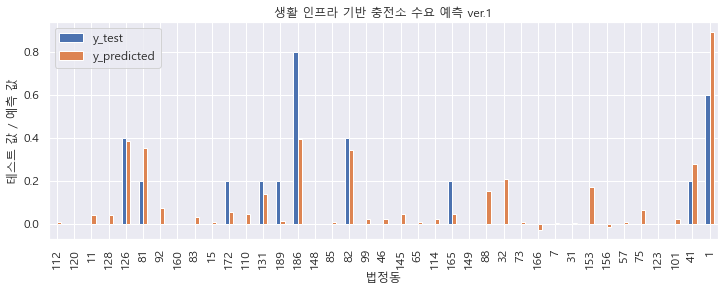

In [22]:
ax = y_compare.plot(kind = 'bar', title = '생활 인프라 기반 충전소 수요 예측 ver.1', 
                   figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('법정동', fontsize = 12)
ax.set_ylabel('테스트 값 / 예측 값', fontsize = 12)
ax.legend(['y_test', 'y_predicted'], fontsize = 12)

# Performance

In [23]:
# R2 Score(결정계수)
print(f'훈련 세트의 정확도 : {lr_model.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lr_model.score(X_test, y_test)}')
print(f'사용한 특성의 수 : {np.sum(lr_model.coef_ != 0)}')

훈련 세트의 정확도 : 0.6456612824609849
테스트 세트의 정확도 : 0.6189203118901062
사용한 특성의 수 : 10


# Improved Performance 

## 1. vif가 높은 feature 제거

<AxesSubplot:>

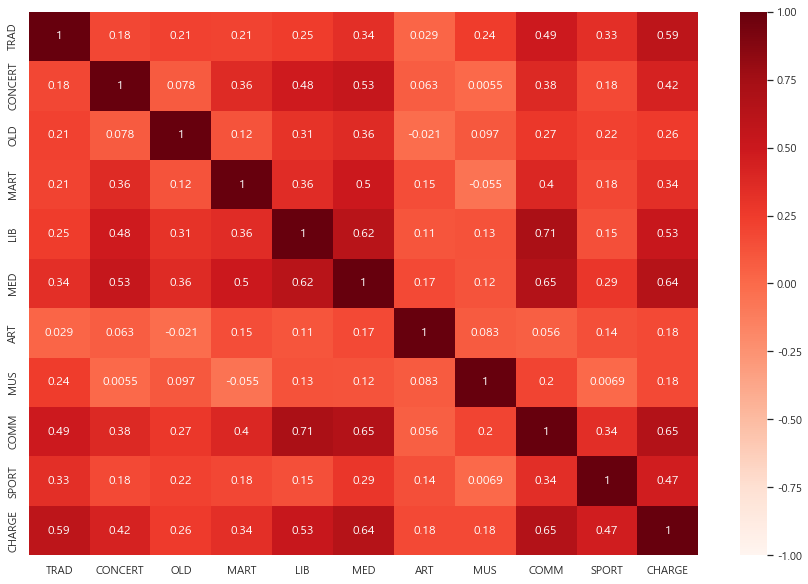

In [24]:
# Heatmap
infra_data_corr = scaled_df[['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'MED', 
                             'ART', 'MUS', 'COMM', 'SPORT', 'CHARGE']]
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(infra_data_corr.corr(), annot = True, cmap = 'Reds', vmin = -1, vmax = 1)

In [25]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(infra_data_corr.values, i) for i in range(infra_data_corr.shape[1])]
vif['features'] = infra_data_corr.columns
vif

,VIF,features
0,1.873540,TRAD
1,1.720543,CONCERT
2,1.623748,OLD
3,1.520779,MART
4,3.359433,LIB
5,3.652625,MED
6,1.154398,ART
7,1.168127,MUS
8,4.292002,COMM
9,1.849235,SPORT


In [26]:
# vif가 높은 계수의 feature 제거 : 'COMM' 컬럼 제거
infra_data_corr = infra_data_corr.drop(['COMM',], axis = 1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(infra_data_corr.values, i) for i in range(infra_data_corr.shape[1])]
vif['features'] = infra_data_corr.columns
vif

,VIF,features
0,1.765333,TRAD
1,1.688078,CONCERT
2,1.617326,OLD
3,1.503053,MART
4,2.381601,LIB
5,3.445258,MED
6,1.131221,ART
7,1.153886,MUS
8,1.751308,SPORT
9,3.561129,CHARGE


In [27]:
vif.features.values

array(['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'MED', 'ART', 'MUS',
       'SPORT', 'CHARGE'], dtype=object)

# ver2. 다중선형 회귀분석

In [28]:
# VIF가 높은 컬럼인 'COMM' 컬럼 제거
infra_data_corr_re = infra_data_corr[['TRAD', 'CONCERT', 'OLD', 'MART', 'ART', 'MUS', 'LIB', 'MED',
                                     'SPORT', 'CHARGE']]
X = infra_data_corr_re[infra_data_corr_re.columns.difference(['CHARGE'])]
y = infra_data_corr_re['CHARGE']

In [29]:
# train : test = 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [30]:
lr = linear_model.LinearRegression()
lr_model2 = lr.fit(X_train, y_train)

## 기존 값과 예측 값 비교

In [31]:
x_new = X_test
y_new = lr_model2.predict(x_new)

In [32]:
y_compare2 = {'y_test' : y_test, 'y_predicted' : y_new}

In [33]:
y_compare2 = pd.DataFrame(y_compare2)

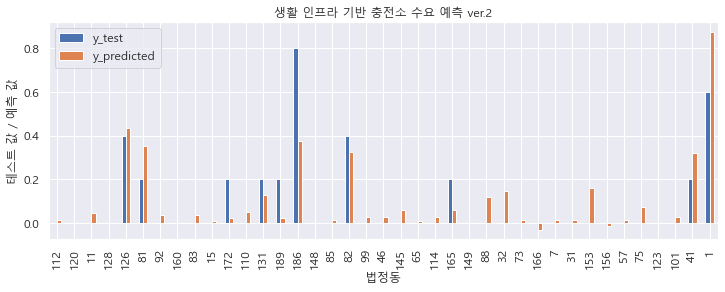

In [34]:
ax = y_compare2.plot(kind = 'bar', title = '생활 인프라 기반 충전소 수요 예측 ver.2', 
                   figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('법정동', fontsize = 12)
ax.set_ylabel('테스트 값 / 예측 값', fontsize = 12)
ax.legend(['y_test', 'y_predicted'], fontsize = 12)

# Performance ver.2

In [35]:
# R2 Score(결정계수)
print(f'훈련 세트의 정확도 : {lr_model2.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lr_model2.score(X_test, y_test)}')
print(f'사용한 특성의 수 : {np.sum(lr_model2.coef_ != 0)}')

훈련 세트의 정확도 : 0.6377601990295321
테스트 세트의 정확도 : 0.6251857115170565
사용한 특성의 수 : 9


# 2. feature의 p-value 검정

In [36]:
import statsmodels.api as sms

X_train = sms.add_constant(X_train)
lr_remodel = sms.OLS(y_train, X_train).fit()
lr_remodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CHARGE   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     28.17
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.14e-27
Time:                        14:23:20   Log-Likelihood:                 87.933
No. Observations:                 154   AIC:                            -155.9
Df Residuals:                     144   BIC:                            -125.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.016      0.114      0.910      -0.029       0.033
ART            0.0972      0.108      0.898      0.371      -0.117       0.311
CONCERT        0.2094      0.108      1.938      0.055      -0.004       0.423
LIB            0.1660      0.070      2.356      0.020       0.027       0.305
MART          -0.0734      0.091     -0.806      0.422      -0.253       0.107
MED            0.5117      0.133      3.858      0.000       0.249       0.774
MUS            0.0281      0.057      0.492      0.623      -0.085       0.141
OLD           -0.0633      0.062     -1.021      0.309      -0.186       0.059
SPORT          0.2423      0.060      4.039      0.000       0.124       0.361
TRAD           0.5525      0.083      6.679      0.000       0.389       0.716
==============================================================================
Omnibus:                       47.350   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.269
Skew:                           1.281   Prob(JB):                     9.32e-26
Kurtosis:                       6.376   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ver3. 다중선형 회귀분석

In [37]:
# t값이 높은 컬럼인 'MART', 'MUS' 제거
infra_data_corr_re = infra_data_corr[['ART', 'CONCERT', 'LIB', 'MED', 'OLD', 'SPORT', 'TRAD','CHARGE']]

X = infra_data_corr_re[infra_data_corr_re.columns.difference(['CHARGE'])]
y = infra_data_corr_re['CHARGE']

In [38]:
# train : test = 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [39]:
lr = linear_model.LinearRegression()
lr_model3 = lr.fit(X_train, y_train)

## 기존 값과 예측 값 비교

In [40]:
x_new = X_test
y_new = lr_model3.predict(x_new)

In [41]:
y_compare3 = {'y_test' : y_test, 'y_predicted' : y_new}

In [42]:
y_compare3 = pd.DataFrame(y_compare3)

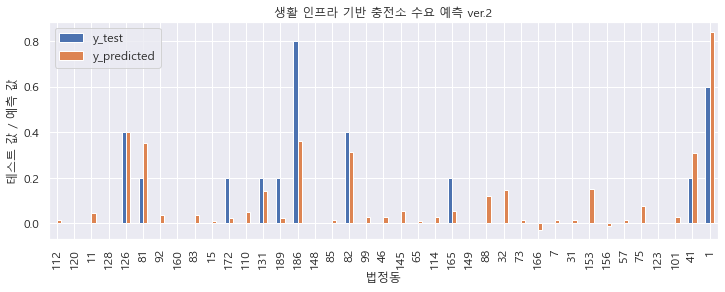

In [43]:
ax = y_compare3.plot(kind = 'bar', title = '생활 인프라 기반 충전소 수요 예측 ver.2', 
                   figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('법정동', fontsize = 12)
ax.set_ylabel('테스트 값 / 예측 값', fontsize = 12)
ax.legend(['y_test', 'y_predicted'], fontsize = 12)

# Performance ver.3

In [44]:
# R2 Score(결정계수)
print(f'훈련 세트의 정확도 : {lr_model3.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lr_model3.score(X_test, y_test)}')
print(f'사용한 특성의 수 : {np.sum(lr_model3.coef_ != 0)}')

훈련 세트의 정확도 : 0.6351278938403017
테스트 세트의 정확도 : 0.6346890422193725
사용한 특성의 수 : 7
